# Questoes

Qual é a distribuição dos preços dos quartos de AirBnb na cidade de Nova York? Min de 0 e max de 10.000, media de 152 e a moda é 100 tendo 1517 locais com este valor
Qual é a localização dos Airbnbs na cidade de Nova York? Podemos plotar um mapa de calor para ajudar na visualização?
Qual é o bairro mais popular para se hospedar na cidade de Nova York? E o menos popular? Area: Manhattan , bairro: Williamsburg // Area: Staten Island , bairro: Woodrow, Rossville ... = 1
Qual é o tipo de quarto mais comum em Airbnbs na cidade de Nova York? Entire home/apt = 25409
Quais são os hosts com mais propriedades listadas na cidade de Nova York? Eles estão localizados em algum bairro específico? Hillside Hotel (Queens), Home away from home (Maioria no Queens), New york Multi-unit building(Dividido em por 4 areas da cidade)
Qual é a tendência de disponibilidade de Airbnbs na cidade de Nova York ao longo do ano? Disponivel: 26146, Indisponivel: 12675
Existe uma correlação entre o número de comentários e a disponibilidade dos Airbnbs em Nova York? muito baixa, de 0 a 1 o valor é 0.17
Qual é a relação entre o preço de um quarto e o número de noites mínimas exigidas para a reserva? Não temos uma relação entre as duas colunas, e a correlação delas é de 0.043
Podemos criar um modelo de previsão de preço com base nas informações do conjunto de dados?
Existe uma relação entre a localização do AirBnb e o número de comentários recebidos?

BONUS: A area da cidade está correlacionado com a maioria, onde Manhattan Possui o maior preço, maior minimo de noites, maior disponibilidade e segundo maior numero de comentarios, e em seguida vem o Brooklyn
BONUS: O tipo de quarto tambem ganha destaque, onde entire home/apt é o com o maior preço, numero de comentarios, minimo de noites e disponibilidade por ano, seguido por private room
Está relação se da em conta pela maior quantidade de de disponibilidade e quantidade de locais disponiveis, se formos pela média ficaria assim: Disponibilidade por ano= 1ºStaten Island =225 dias por media/ 4º Manhattan = 178 dias por media
numero de comentarios: 1º Brooklyn com media de 34 comments, minimo de noite:1º manhattan com media de 10 noites minima, e o tipo de quarto Entire = 1º Manhattan, Private = 1º Bronx/Queens, Shared = 1º Bronx


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('AB_NYC_2019.csv')

In [3]:
base = base.rename(columns = {'id':'ID','name':'Nome do local','host_id':'ID do host','host_name':'Nome do host',
                              'neighbourhood_group':'Area da cidade','neighbourhood':'Bairro','latitude':'Latitude',
                             'longitude':'Longitude','room_type':'Tipo de quarto','price':'Preço','minimum_nights':'Minimo de noites',
                             'number_of_reviews':'Numero de comentarios','last_review':'Ultimo comentario',
                              'reviews_per_month':'Comentarios por mes','calculated_host_listings_count':'contagem calculada de listas de hosts',
                               'availability_365':'Disponibilidade por ano'})

In [4]:
base = base.drop('ID',axis = 1)

In [5]:
base['ID']=range(0,48895)

In [6]:
base.head()

,Nome do local,ID do host,Nome do host,Area da cidade,Bairro,Latitude,Longitude,Tipo de quarto,Preço,Minimo de noites,Numero de comentarios,Ultimo comentario,Comentarios por mes,contagem calculada de listas de hosts,Disponibilidade por ano,ID
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4


In [7]:
base['Preço'].mode()

0    100
Name: Preço, dtype: int64

In [8]:
base[base['Preço']==100].value_counts().sum()

1517

C:\Users\Isac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

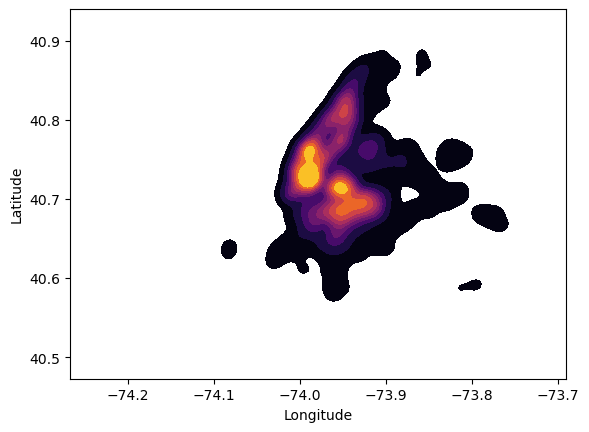

In [9]:
import pandas as pd
import seaborn as sns


# Criando um dataframe apenas com as colunas de longitude e latitude
coordinates = base[['Longitude', 'Latitude']]

# Plotando o mapa de calor
sns.kdeplot(coordinates['Longitude'], coordinates['Latitude'], shade=True, cmap='inferno')


In [10]:
base

,Nome do local,ID do host,Nome do host,Area da cidade,Bairro,Latitude,Longitude,Tipo de quarto,Preço,Minimo de noites,Numero de comentarios,Ultimo comentario,Comentarios por mes,contagem calculada de listas de hosts,Disponibilidade por ano,ID
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,48890
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,48891
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,48892
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,48893


In [11]:
base['Area da cidade'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
base3 = base[base['Disponibilidade por ano']!=0]

In [13]:
popular = base3.groupby('Area da cidade')[['Disponibilidade por ano']].mean()

In [14]:
popular.sort_values('Disponibilidade por ano',ascending = False)

,Disponibilidade por ano
Area da cidade,
Staten Island,225.015106
Bronx,197.858862
Queens,190.429037
Manhattan,178.891216
Brooklyn,164.361338


In [15]:
base.groupby('Bairro')['ID'].nunique().sort_values(ascending = False).head(10)

Bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: ID, dtype: int64

In [16]:
base['Tipo de quarto'].mode()

0    Entire home/apt
Name: Tipo de quarto, dtype: object

In [17]:
base.groupby(['Area da cidade','Nome do local'])['ID'].nunique().sort_values(ascending = False).head(15)

Area da cidade  Nome do local                                     
Queens          Hillside Hotel                                        18
Brooklyn        Brooklyn Apartment                                    12
                Loft Suite @ The Box House Hotel                      11
                Artsy Private BR in Fort Greene Cumberland            10
                Private room in Williamsburg                           8
Queens          Home away from home                                    8
Brooklyn        Cozy Brooklyn Apartment                                8
                Beautiful Brooklyn Brownstone                          8
                Private room in Brooklyn                               8
Manhattan       Harlem Gem                                             7
                Private room in Manhattan                              6
                West Village Apartment                                 6
                IN MINT CONDITION-STUDIOS EAST 44TH/UNITE

In [18]:
base.groupby('Nome do local')['ID'].nunique().sort_values(ascending = False)

Nome do local
Hillside Hotel                                       18
Home away from home                                  17
New york Multi-unit building                         16
Brooklyn Apartment                                   12
Private Room                                         11
                                                     ..
Cozy home, away from home. 15 mins from downtown.     1
Cozy house , very quiet , clean room !                1
Cozy house in Sunnyside gardens                       1
Cozy in Bedstuy                                       1
ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡          1
Name: ID, Length: 47905, dtype: int64

In [19]:
aux=base[base['Nome do local']=='New york Multi-unit building']

In [20]:
aux = aux.groupby('Area da cidade')['ID'].nunique()

In [21]:
aux

Area da cidade
Bronx        1
Brooklyn     5
Manhattan    5
Queens       5
Name: ID, dtype: int64

In [22]:
base['Nome do local'].value_counts().sum()

48879

In [23]:
base['Disponibilidade por ano'].mean()

112.78132733408324

In [24]:
base[base['Disponibilidade por ano']!=0].value_counts().sum() - base[base['Disponibilidade por ano']==0].value_counts().sum()

13471

In [25]:
base['Disponibilidade por ano'][base['Disponibilidade por ano']!=0].mean()

175.83199413302722

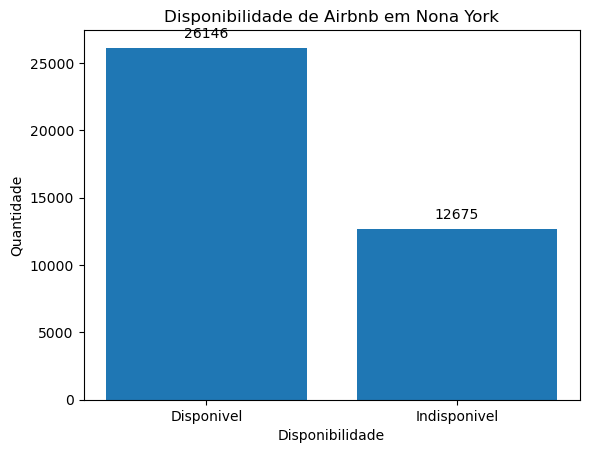

In [26]:
naozero = base[base['Disponibilidade por ano']!=0].value_counts().sum()
zero =  base[base['Disponibilidade por ano']==0].value_counts().sum()

data = {'Disponibilidade': ['Disponivel', 'Indisponivel'],
       'Quantidade': [naozero, zero]}

df = pd.DataFrame(data)

fig, ax = plt.subplots()

ax.bar(df['Disponibilidade'], df['Quantidade'])

for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize=10, padding=5)
    
ax.set(title='Disponibilidade de Airbnb em Nona York',
      xlabel='Disponibilidade',
      ylabel='Quantidade')
    
plt.show()

In [27]:
base2 = base.groupby('Nome do local')[['Disponibilidade por ano','Numero de comentarios']].sum().sort_values('Disponibilidade por ano', ascending = False)

<AxesSubplot:>

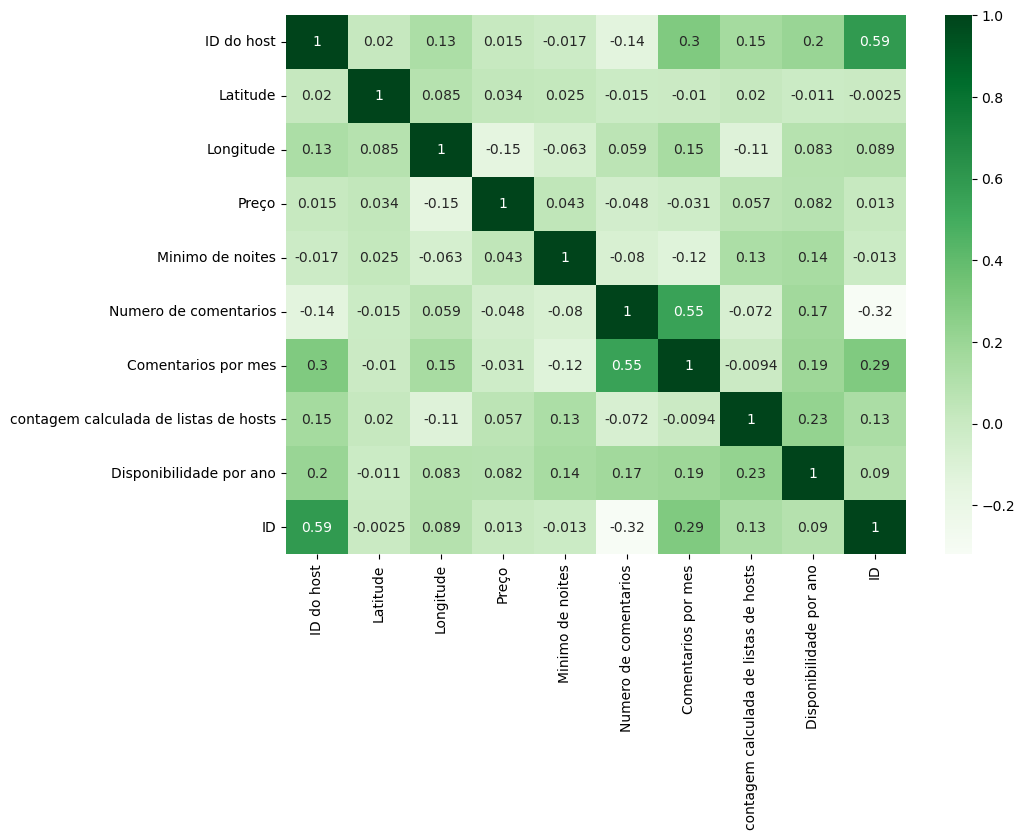

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(base.corr(), annot=True, cmap='Greens')

In [29]:
base.groupby('Nome do local')[['Preço','Minimo de noites']].sum().sort_values('Preço', ascending = False)

,Preço,Minimo de noites
Nome do local,,
1-BR Lincoln Center,10000,30
Luxury 1 bedroom apt. -stunning Manhattan views,10000,5
Furnished room in Astoria apartment,10000,100
2br - The Heart of NYC: Manhattans Lower East Side,9999,30
"Quiet, Clean, Lit @ LES & Chinatown",9999,99
...,...,...
Spacious comfortable master bedroom with nice view,0,1
"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",0,2
Best Coliving space ever! Shared room.,0,30


In [30]:
base.groupby('Area da cidade')[['Preço','Numero de comentarios','Minimo de noites','Disponibilidade por ano']].sum().sort_values('Preço', ascending = False)

,Preço,Numero de comentarios,Minimo de noites,Disponibilidade por ano
Area da cidade,,,,
Manhattan,4264527,454569,185833,2425586
Brooklyn,2500600,486574,121761,2015070
Queens,563867,156950,29358,818464
Bronx,95459,28371,4976,180843
Staten Island,42825,11541,1802,74480


In [31]:
base.groupby('Tipo de quarto')[['Preço','Numero de comentarios','Minimo de noites','Disponibilidade por ano']].sum().sort_values('Preço', ascending = False)

,Preço,Numero de comentarios,Minimo de noites,Disponibilidade por ano
Tipo de quarto,,,,
Entire home/apt,5381480,580403,216152,2843783
Private room,2004450,538346,120067,2482739
Shared room,81348,19256,7511,187921


In [32]:
base3.groupby('Area da cidade')[['Numero de comentarios']].mean().sort_values('Numero de comentarios',ascending = False)

,Numero de comentarios
Area da cidade,
Brooklyn,34.694698
Queens,33.476733
Staten Island,32.824773
Bronx,29.083151
Manhattan,28.930378


In [33]:
base3.groupby('Area da cidade')[['Minimo de noites']].mean().sort_values('Minimo de noites',ascending = False)

,Minimo de noites
Area da cidade,
Manhattan,10.883915
Brooklyn,6.963703
Queens,5.240810
Bronx,4.857768
Staten Island,4.839879


In [34]:
base3

,Nome do local,ID do host,Nome do host,Area da cidade,Bairro,Latitude,Longitude,Tipo de quarto,Preço,Minimo de noites,Numero de comentarios,Ultimo comentario,Comentarios por mes,contagem calculada de listas de hosts,Disponibilidade por ano,ID
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,48890
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,48891
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,48892
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,48893


In [35]:
base3.groupby('Tipo de quarto')[['Area da cidade']].value_counts()

Tipo de quarto   Area da cidade
Entire home/apt  Manhattan         8441
                 Brooklyn          6072
                 Queens            1550
                 Bronx              318
                 Staten Island      152
Private room     Brooklyn          5880
                 Manhattan         4782
                 Queens            2586
                 Bronx              546
                 Staten Island      171
Shared room      Manhattan          336
                 Brooklyn           308
                 Queens             162
                 Bronx               50
                 Staten Island        8
dtype: int64

In [36]:
base

,Nome do local,ID do host,Nome do host,Area da cidade,Bairro,Latitude,Longitude,Tipo de quarto,Preço,Minimo de noites,Numero de comentarios,Ultimo comentario,Comentarios por mes,contagem calculada de listas de hosts,Disponibilidade por ano,ID
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,48890
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,48891
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,48892
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,48893


In [48]:
media_tipo_quarto = base.groupby(['Area da cidade', 'Tipo de quarto'])['Tipo de quarto'].count().unstack('Tipo de quarto').fillna(0)
media_tipo_quarto['Total'] = media_tipo_quarto.sum(axis=1)
media_tipo_quarto = media_tipo_quarto.div(media_tipo_quarto['Total'], axis=0)
media_tipo_quarto = media_tipo_quarto.drop(columns=['Total'])


In [46]:
media_tipo_quarto

Tipo de quarto,Entire home/apt,Private room,Shared room
Area da cidade,,,
Bronx,0.347388,0.597617,0.054995
Brooklyn,0.475478,0.503979,0.020543
Manhattan,0.609344,0.368496,0.022160
Queens,0.369926,0.595129,0.034945
Staten Island,0.471850,0.504021,0.024129


In [53]:
media_preço = base.groupby(['Area da cidade'])['Preço'].count()

In [58]:
media_preço = base[['Preço','Area da cidade']]

In [59]:
media_preço

,Preço,Area da cidade
0,149,Brooklyn
1,225,Manhattan
2,150,Manhattan
3,89,Brooklyn
4,80,Manhattan
...,...,...
48890,70,Brooklyn
48891,40,Brooklyn
48892,115,Manhattan
48893,55,Manhattan


In [66]:
base[['Preço','Area da cidade']].sort_values('Preço',ascending=False)

,Preço,Area da cidade
9151,10000,Queens
17692,10000,Brooklyn
29238,10000,Manhattan
40433,9999,Manhattan
12342,9999,Manhattan
...,...,...
25778,0,Brooklyn
25796,0,Brooklyn
25433,0,Bronx
26841,0,Brooklyn


<AxesSubplot:ylabel='Tipo de quarto'>

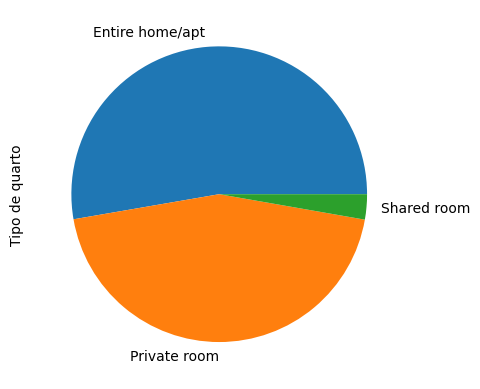

In [71]:
base['Tipo de quarto'][base['Disponibilidade por ano']>0].value_counts().plot(kind='pie')

<AxesSubplot:>

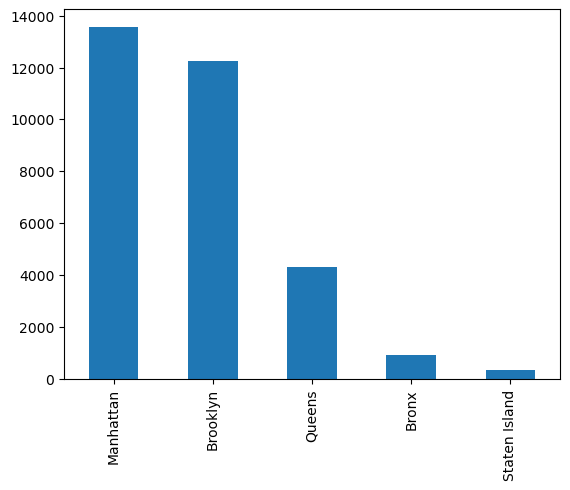

In [69]:
base['Area da cidade'][base['Disponibilidade por ano']>0].value_counts().plot(kind='bar')

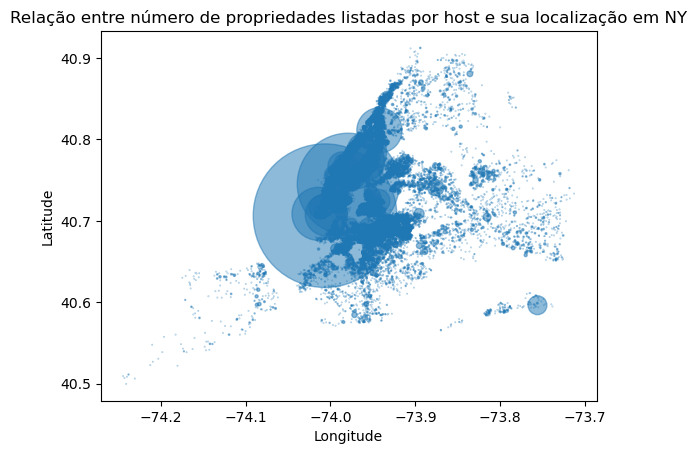

In [72]:
df = base

# agrupar os dados por ID do host e calcular a soma de propriedades listadas
df = df.groupby("ID do host").agg({"Latitude": "first", "Longitude": "first", "contagem calculada de listas de hosts": "sum"})

# plotar o gráfico de dispersão
plt.scatter(df["Longitude"], df["Latitude"], s=df["contagem calculada de listas de hosts"]/10, alpha=0.5)

# definir o título e os rótulos dos eixos
plt.title("Relação entre número de propriedades listadas por host e sua localização em NY")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# exibir o gráfico
plt.show()
